In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf

In [2]:
total_points = 200
x_data = np.linspace(0,50,total_points)
y_data = np.array([.5*x + 20*np.sin((np.pi*x)/50) for x in range(total_points)])

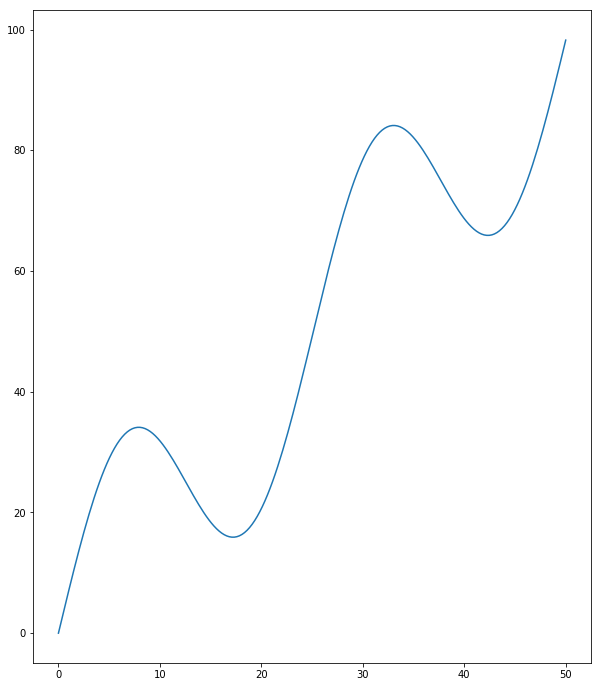

In [3]:
plt.figure(figsize=(10,12))
plt.plot(x_data,y_data,'-')
plt.show()

In [4]:
learning_rate = .0001
epochs = 1000

tf.reset_default_graph()

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

m = tf.Variable(2.)
b = tf.Variable(10.)

pred = tf.add(tf.multiply(x,m),b)
loss = tf.reduce_sum(tf.pow(tf.subtract(pred,y),2))
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(loss)

slope_pred = []
bias_pred = []
cost_log = []

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for e in range(epochs):
        perm = np.random.permutation(len(x_data))
        x_data = x_data[perm]
        y_data = y_data[perm]
        for _x,_y in zip(x_data,y_data):
            sess.run(optimizer, feed_dict={x:_x,y:_y})
            learning_rate = learning_rate/10
        cost_value = sess.run(loss, feed_dict={x:x_data,y:y_data})
        cost_log.append(cost_value)
        bias_pred.append(sess.run(b))
        slope_pred.append(sess.run(m))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [ ]:
# Visualize convergence
plt.figure(figsize=(10,10))
plt.plot([i for i in range(epochs)],cost_log,'o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Visualize Cost function converging')
plt.show()

lop_off = 10
plt.figure(figsize=(10,10))
plt.plot([i for i in range(epochs-lop_off)],cost_log[lop_off:],'o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Visualize Cost function converging \n Removed first {} points.'.format(lop_off))
plt.show()

plt.figure(figsize=(10,10))
plt.plot([i for i in range(epochs)],slope_pred,'o')
plt.xlabel('Epochs')
plt.ylabel('Slope')
plt.title('Visualize the value of slope converging')
plt.show()

plt.figure(figsize=(10,10))
plt.plot([i for i in range(epochs)],slope_pred,'o')
plt.xlabel('Epochs')
plt.ylabel('bias')
plt.title('Visualize the value of the bias converging')
plt.show()


In [ ]:
# Plot Regression Line
slope_value = slope_pred[-1]
bias_value = bias_pred[-1]
# The one fifth scalar due to the fact that x_data is in one fifth increments
linear = np.linspace(0,50,total_points)
reg_line = [slope_value*(x/5)+bias_value for x in range(total_points)]

plt.figure(figsize=(10,10))
plt.plot(x_data,y_data,'o')
plt.plot(linear,reg_line)
plt.title("Regression")
plt.show()

In [ ]:
print('Bias is {} and slope is {}.'.format(bias_pred[-1],slope_pred[-1]))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit([x_data],[y_data])
x_data = np.sort(x_data)
pred = model.predict([x_data])
pred = pred.reshape(200,)
pred = np.sort(pred)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(x_data,y_data)
plt.plot(x_data.reshape(200,),pred.reshape(200,))